### Performance depedence on the neural network hyperparameters

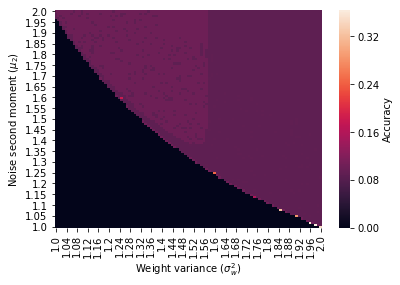

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd

results = pd.read_csv("results_cifar/results50.csv", header=None)
ax = sns.heatmap(results.pivot(4, 2, 7), cbar_kws={'label':"Accuracy"})
ax.invert_yaxis()
plt.xlabel(r"Weight variance ($\sigma^2_w$)")
plt.ylabel(r"Noise second moment ($\mu_2$)")
plt.show()

### Effect of noise on uncertainty estimation and kernel norm

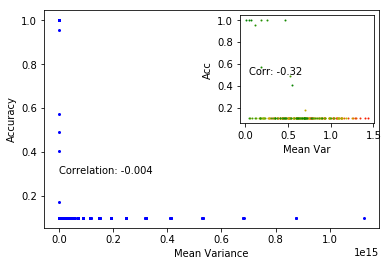

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from colour import Color

var = np.array(results[8])
accs = np.array(results[6])
weight_var = np.array(results[2])
mu_2 = np.array(results[4])
nan_index = np.where(np.isnan(var))[0]
var = np.delete(var, nan_index)
acc = np.delete(np.array(accs), nan_index)
w = np.delete(np.array(weight_var), nan_index)
mu2 = np.delete(np.array(mu_2), nan_index)
corr = np.corrcoef(var,acc)[0, 1]
diff = np.abs(w - 2/mu2) 

# set colours
green = Color("green")
colors = list(green.range_to(Color("red"),len(var)))
colors = np.array(colors)[diff.argsort()]

fig, ax = plt.subplots()
inset_axes = inset_axes(ax,
                    width="40%", # width = 30% of parent_bbox
                    height=1.5, # height : 1 inch
                    loc=1)

ax.plot(var, acc, 'ro', c='blue', markersize=2)
ax.set_xlabel('Mean Variance')
ax.set_ylabel('Accuracy')
ax.text(200000, 0.3, 'Correlation: %1.3f' % corr)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

var_crit = var[diff < 0.01]
acc_crit = acc[diff < 0.01]
mu2_crit = mu2[diff < 0.01]
corr = np.corrcoef(var_crit, acc_crit)[0, 1]
green = Color("green")
colors = list(green.range_to(Color("red"),len(mu2_crit)))
colors = np.array(colors)[mu2_crit.argsort()]
for v,a,c in zip(var_crit, acc_crit, colors):
    #inset_axes.plot(var_crit, acc_crit, 'ro', c='darkgreen', markersize=2)
    if len(str(c)) > 5:
        inset_axes.plot(v, a, 'ro', c=str(c), markersize=1)
inset_axes.text(0.05,0.5, 'Corr: %1.2f' % corr)
inset_axes.set_ylabel('Acc')
inset_axes.set_xlabel('Mean Var')
plt.show()

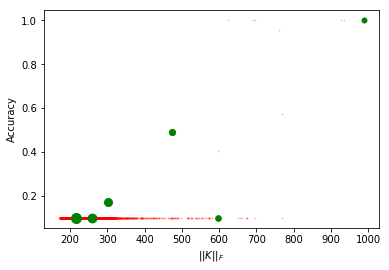

In [8]:
norm = np.array(results[9])
n = np.delete(np.array(norm), nan_index)
eps = 0.0001
plt.plot(n[diff > eps], acc[diff > eps], 'ro', c="red", markersize=1, alpha=0.2)
for no, a, m in zip(n[diff < eps], acc[diff < eps], mu2[diff < eps]):
    plt.plot(no, a, 'ro', c="green", markersize=5*m)
plt.xlabel(r'$||K||_F$')
plt.ylabel("Accuracy")
plt.show()

### Compute evolution of kernel function for diagonal and off-diagonal elements of K

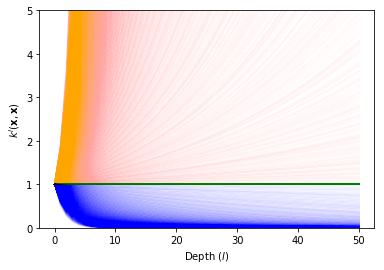

In [9]:
for w in np.arange(1.0, 2.0, 0.01):
    for m in np.arange(1.0, 2.0, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if 0.5*w*m > 1:
            col = 'orange'
            alpha = 0.002
        elif 0.5*w*m < 1:
            col = 'blue'
            alpha=0.002
        elif 0.5*w*m == 1.0:
            col = 'green'
            alpha=1
        load_string = str(w) + "_" + str(m) + ".npy"
        qs = np.load('results_cifar/vars/50_' + load_string, encoding='latin1')
        plt.plot(qs, c=col, alpha=alpha, linewidth=2)
plt.ylim(0, 5)
plt.xlabel(r'Depth ($l$)')
plt.ylabel(r'$k^l(\mathbf{x}, \mathbf{x})$')
plt.show()

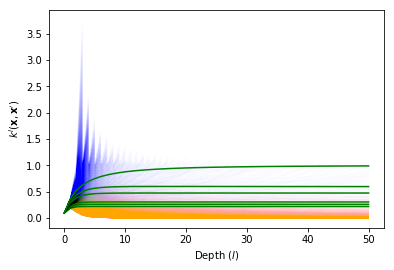

In [10]:
eps = 0.0001
for w in np.arange(1.0, 2.01, 0.01):
    for m in np.arange(1.0, 2.01, 0.01):
        w = np.round(w, 5)
        m = np.round(m, 5)
        if 0.5*w*m > 1 and np.abs(w - 2/m) > eps:
            col = 'orange'
            alpha = 0.002
        elif 0.5*w*m < 1 and np.abs(w - 2/m) > eps:
            col = 'blue'
            alpha=0.002
        elif np.abs(w - 2/m) < eps:
            col = 'green'
            alpha=1
        load_string = str(w) + "_" + str(m) + ".npy"
        cs = np.load('results_cifar/corrs/50_' + load_string, encoding='latin1')
        #cor_per_layer = [x[2,3] for x in qs]
        plt.plot(cs, c=col, alpha=alpha)
plt.xlabel(r'Depth ($l$)')
plt.ylabel(r'$k^l(\mathbf{x}, \mathbf{x}^{\prime})$')
plt.show()